In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from skimage.util.montage import montage2d
import tflearn
from PIL import Image
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#importing data
from tensorflow.examples.tutorials.mnist import input_data
#one hot encoding returns an array of zeroes and a single one. One corresponds to the class
data=input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


one_hot returns an array of 0 and 1 where one corresponds to the true numerical value of output.
Eg. for 2 in the picture, the corresponding array is{0,0,1,0,0,0,0,0,0,0,0}. If one_hot is chosen as False then it will just return a number and not an array.

In [3]:
print( "shape of images in out train dataset{}".format(data.train.images.shape))
print("shape of classes in out train dataset{}".format(data.train.labels.shape))
print( "shape of data in out test dataset{}".format(data.test.images.shape))
print("shape of classes in out test dataset{}".format(data.test.labels.shape))
print("shape of images in out validation dataset{}".format(data.validation.images.shape))
print("shape of classes in out validation dataset{}".format(data.validation.labels.shape))

shape of images in out train dataset(55000, 784)
shape of classes in out train dataset(55000, 10)
shape of data in out test dataset(10000, 784)
shape of classes in out test dataset(10000, 10)
shape of images in out validation dataset(5000, 784)
shape of classes in out validation dataset(5000, 10)


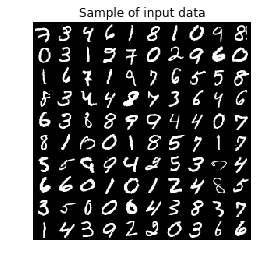

In [4]:
# function to display montage of input data
imgs=data.train.images[0:100]
montage_img=np.zeros([100,28,28])
for i in range(len(imgs)):
    montage_img[i]=imgs[i].reshape(28,28)
plt.imshow(montage2d(montage_img),cmap="gray")
plt.title("Sample of input data")
plt.axis("off")
plt.show()


In [5]:
images=data.train.images
images=np.reshape(images,[images.shape[0],28,28])
mean_img=np.mean(images, axis=0)
std_img=np.std(images,axis=0)

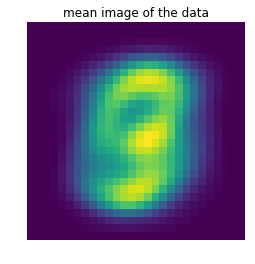

In [6]:
plt.imshow(mean_img)
plt.title("mean image of the data")
plt.colorbar
plt.axis('off')
plt.show()


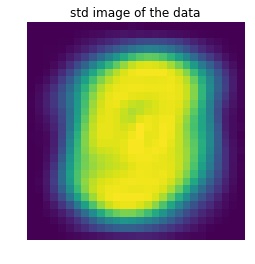

In [7]:
plt.imshow(std_img)
plt.title("std image of the data")
plt.colorbar
plt.axis('off')
plt.show()



In [8]:
#None states that the value can be anything i.e we can feed any number of images; 784=28X28 which is the dimension 
#imput image
x=tf.placeholder(tf.float32,shape=[None,784])
#input class
y_=tf.placeholder(tf.float32,shape=[None,10])

# Model


Series of convolutional layer followed by fullyconnected layer and a softmax layer
Each convolutional layer consist of convolution operation followed by non linear activation function and pooling layer.

# Our model layout

input layer>>convolutional layer 1>>convolutional layer 2>>fully connected layer>>softmax layer

In [9]:
#input layer
#reshaping input layer for convolutional operation in tensorflow
#'-1' states that there is no fixed batch dimension, 28X28 reshaped from 784 pixels and '1' for a single channel 
#i.e for a grey scale image
x_input=tf.reshape(x,[-1,28,28,1], name= 'input')
#first convolutional layer with 32output filters, filter size 5x5 with some padding and 2 strides and reLu activation
#optionally we can add max pooling also
conv_layer1=tflearn.layers.conv.conv_2d(x_input,nb_filter=32,filter_size=5,strides=[1,1,1,1], padding='same',activation="relu",regularizer='L2',name='conv_layer_1')
#2X2 max_pooling layer
out_layer1=tflearn.layers.max_pool_2d(conv_layer1, 2)

#Second convolutional layer
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1,nb_filter=32,filter_size=5, strides=[1,1,1,1], padding='same',activation='relu',regularizer='L2', name='conv_layer_2')
out_layer2=tflearn.layers.max_pool_2d(conv_layer2, 2)

#fully connected layer
fcl=tflearn.layers.core.fully_connected(out_layer2, 1024, activation ='relu')
fcl_dropout=tflearn.layers.core.dropout(fcl,0.8)
y_predicted=tflearn.layers.fully_connected(fcl_dropout, 10, activation='softmax', name ='output')



In [11]:
#loss function
cross_aentropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y_predicted),reduction_indices=[1]))
#optimiser
train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of the model
correct_prediction=tf.equal(tf.argmax(y_predicted,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
#session parameter
sess=tf.InteractiveSession() 
#initializing variables
init=tf.global_variables_initializer()
sess.run(init)

In [13]:
#grabbing the default graph
g=tf.get_default_graph()
#every operation in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'Placeholder',
 'Placeholder_1',
 'input/shape',
 'input',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/random_unifor

In [14]:
#number of iterations
epoch=15000
batch_size=50
#print "loss:{}, Accuracy on the test set: {}%".format(loss,Accuracy)


In [16]:
for i in range(epoch):
    #batch wise training
    x_batch,y_batch=data.train.next_batch(batch_size)
    _,loss=sess.run([train_step,cross_entropy], feed_dict={x: x_batch,y_:y_batch})
    
    if i%500==0:
        Accuracy=sess.run(accuracy,feed_dict={x:data.test.images,y_:data.test.labels})
        Accuracy=round(Accuracy*100,2)
        print("loss: {},accuracy:{}% ".format(loss,Accuracy))
    elif i%100==0:
        print("loss:{}".format(loss))

loss: 2.3086137771606445,accuracy:18.4% 
loss:0.7091745734214783
loss:0.2408646047115326
loss:0.3728005290031433
loss:0.20978198945522308
loss: 0.07833864539861679,accuracy:94.74% 
loss:0.21160754561424255
loss:0.03376316651701927
loss:0.02107381261885166
loss:0.10516741871833801
loss: 0.1772918850183487,accuracy:96.97% 
loss:0.02590407431125641
loss:0.02514718286693096
loss:0.03618157282471657
loss:0.10000185668468475
loss: 0.029210040345788002,accuracy:97.67% 
loss:0.09921005368232727
loss:0.06892137229442596
loss:0.15264226496219635
loss:0.06812752038240433
loss: 0.17760847508907318,accuracy:98.15% 
loss:0.1557256281375885
loss:0.023956190794706345
loss:0.03604552894830704
loss:0.032468248158693314
loss: 0.27380403876304626,accuracy:98.28% 
loss:0.0417475551366806
loss:0.06946180760860443
loss:0.02446143329143524
loss:0.028459977358579636
loss: 0.023020567372441292,accuracy:98.46% 
loss:0.013506526127457619
loss:0.05920746922492981
loss:0.024179307743906975
loss:0.004923380445688963

In [19]:
validation_accuracy=round((sess.run(accuracy,feed_dict={x: data.validation.images,
                                                        y_:data.validation.labels}))*100,2)
print("accuracy in the validation dataset:{}%".format(validation_accuracy) )



accuracy in the validation dataset:99.04%


In [20]:
#test predictions
y_test=(sess.run(y_predicted,feed_dict={x: data.test.images}))

In [22]:
#confusion matrix
true_class=np.argmax(data.test.labels,1)
predicted_class=np.argmax(y_test,1)
cm=confusion_matrix(predicted_class,true_class)
cm

array([[ 978,    0,    0,    0,    0,    2,    8,    0,    3,    0],
       [   0, 1133,    2,    0,    0,    0,    3,    1,    0,    1],
       [   0,    1, 1027,    1,    0,    0,    1,    3,    2,    0],
       [   0,    0,    0, 1005,    0,    6,    1,    0,    1,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    0,    4],
       [   0,    0,    0,    4,    0,  881,    5,    0,    1,    2],
       [   0,    0,    0,    0,    0,    1,  935,    0,    0,    0],
       [   0,    1,    1,    0,    0,    0,    0, 1023,    1,    3],
       [   0,    0,    2,    0,    0,    0,    2,    1,  963,    0],
       [   2,    0,    0,    0,    8,    2,    0,    0,    3,  999]])

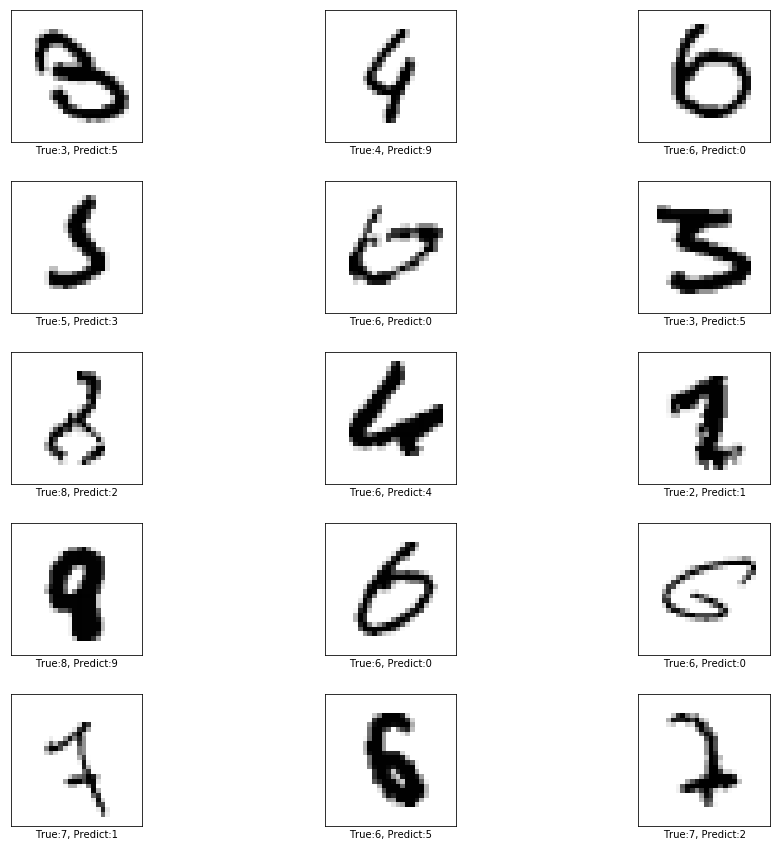

In [28]:
#finding the error outputs
idx=np.argmax(y_test,1)==np.argmax(data.test.labels,1)
cmp=np.where(idx==False)
#plotting the errors 
fig, axes=plt.subplots(5,3, figsize=(15,15))
fig.subplots_adjust(hspace=0.3,wspace=0.5)
cls_true=np.argmax(data.test.labels,1)[cmp]
cls_pred=np.argmax(y_test,1)[cmp]
images=data.test.images[cmp]
for i,ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28),cmap='binary')
    xlabel="True:{}, Predict:{}".format(cls_true[i],cls_pred[i])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()    